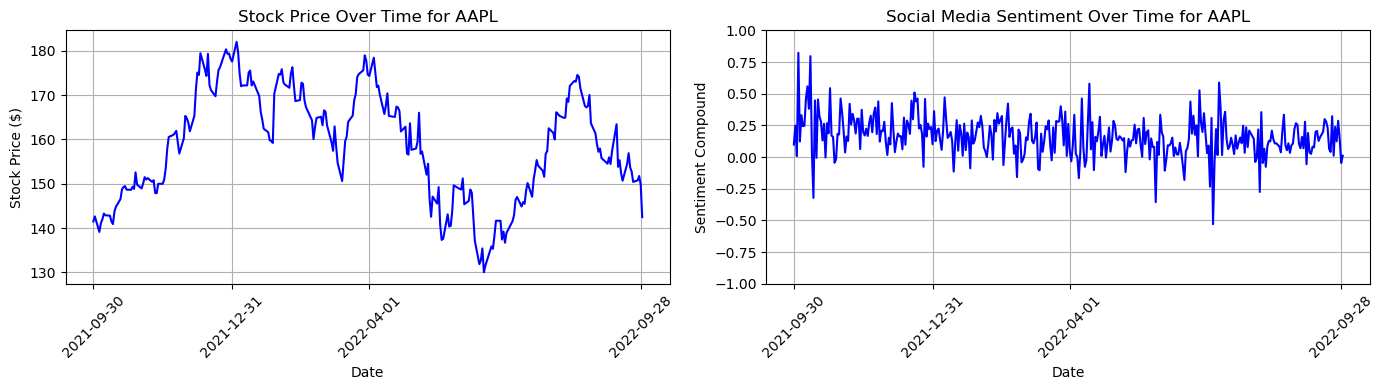

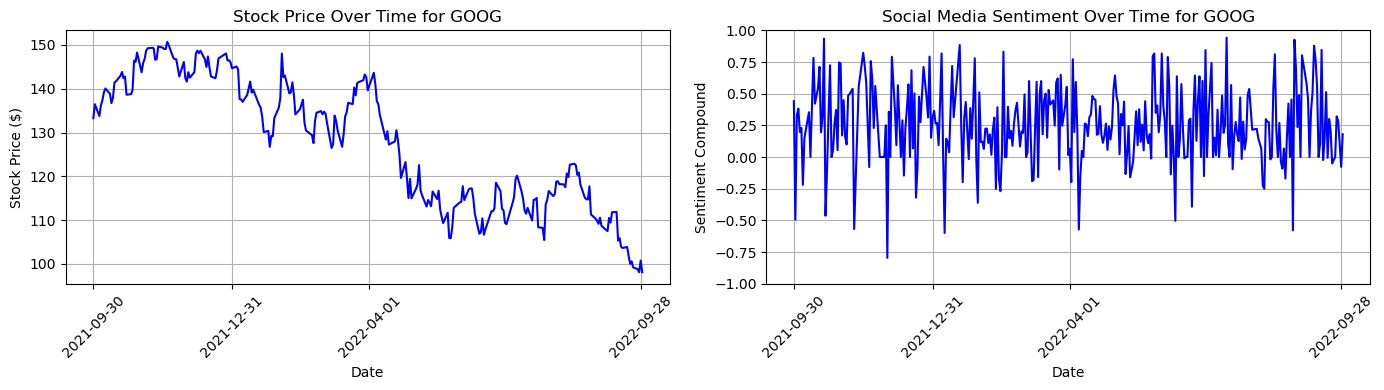

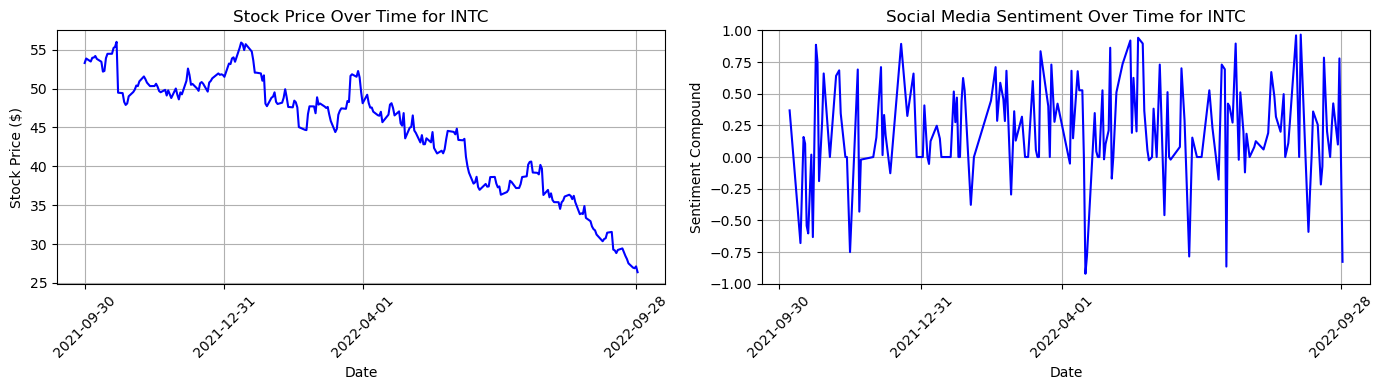

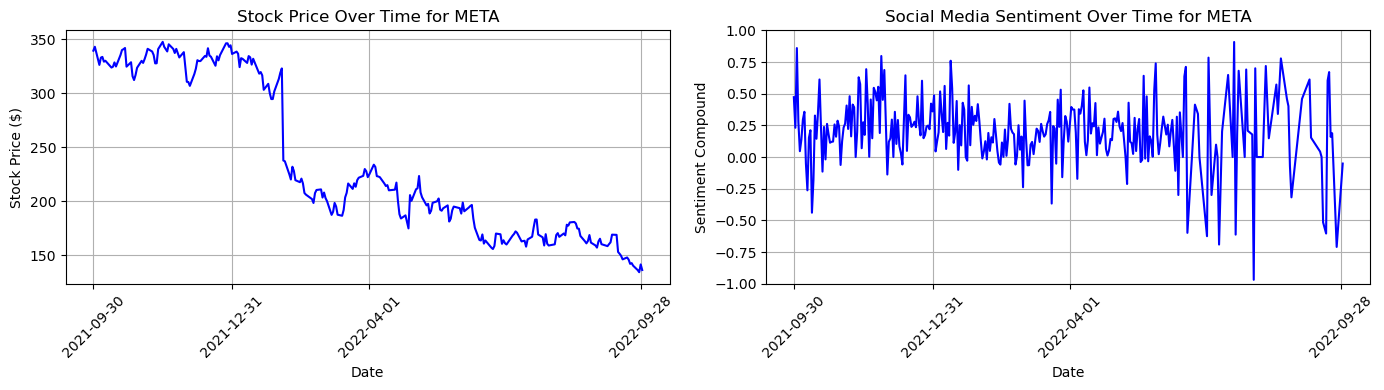

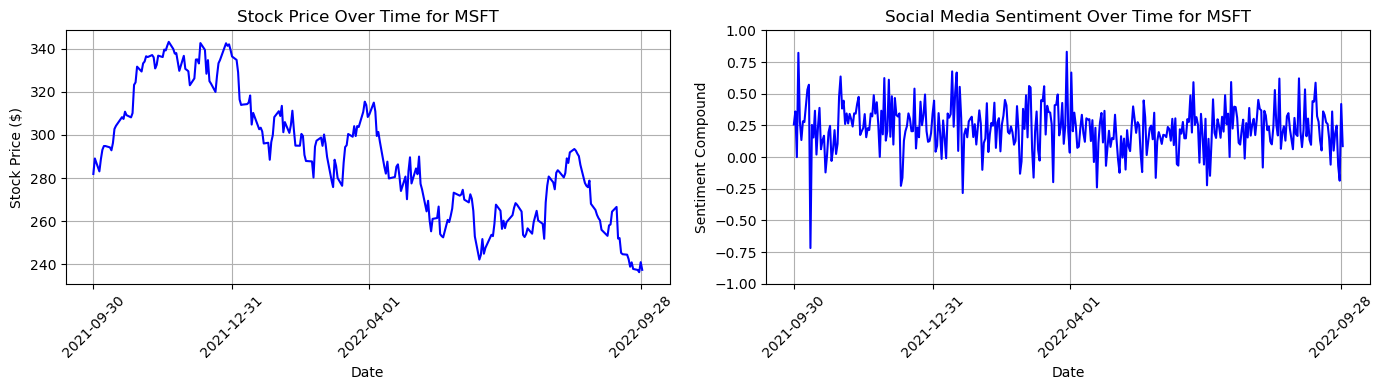

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    curr_finance_df = pd.read_csv(f'{stock} Data/{stock}_finance_data.csv')
    curr_sentiment_df = pd.read_csv(f'{stock} Data/{stock}_avg_sentiment_data.csv')

    curr_finance_df['Date'] = pd.to_datetime(curr_finance_df['Date'])
    curr_sentiment_df['Date'] = pd.to_datetime(curr_sentiment_df['Date'])

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), sharey=False)

    # Finance plot (left)
    ax1.plot(curr_finance_df['Date'], curr_finance_df['Close'], linestyle='-', color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"Stock Price Over Time for {stock}")
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in xticks], rotation=45)
    ax1.grid(True)

    # Sentiment plot (right)
    ax2.plot(curr_sentiment_df['Date'], curr_sentiment_df['sentiment_compound'], linestyle='-', color='blue')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Sentiment Compound")
    ax2.set_title(f"Social Media Sentiment Over Time for {stock}")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([d.strftime('%Y-%m-%d') for d in xticks], rotation=45)
    ax2.set_ylim(-1, 1)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


### Standardized Data

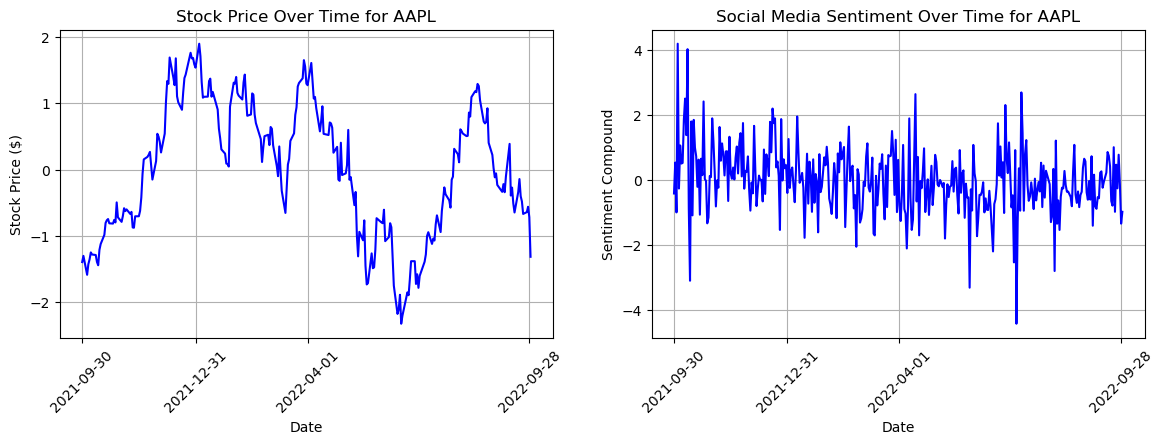

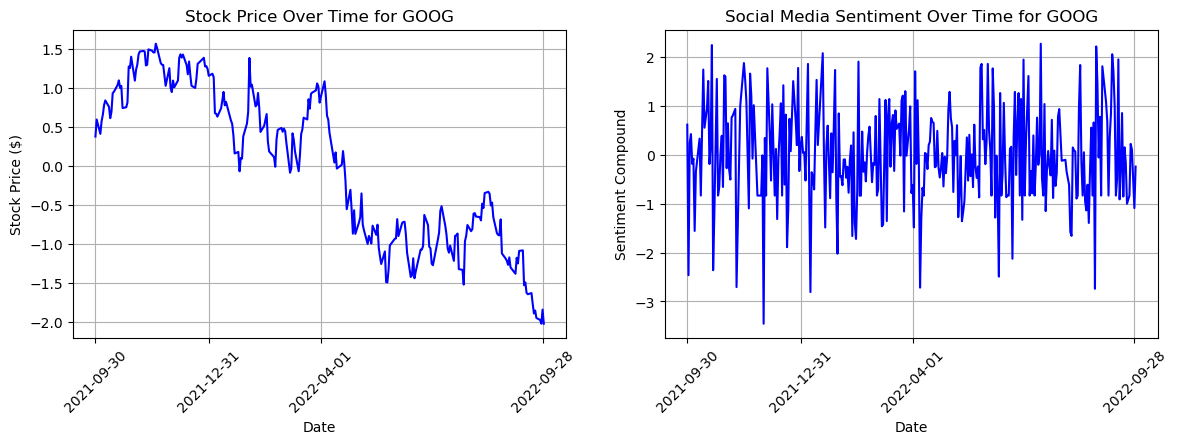

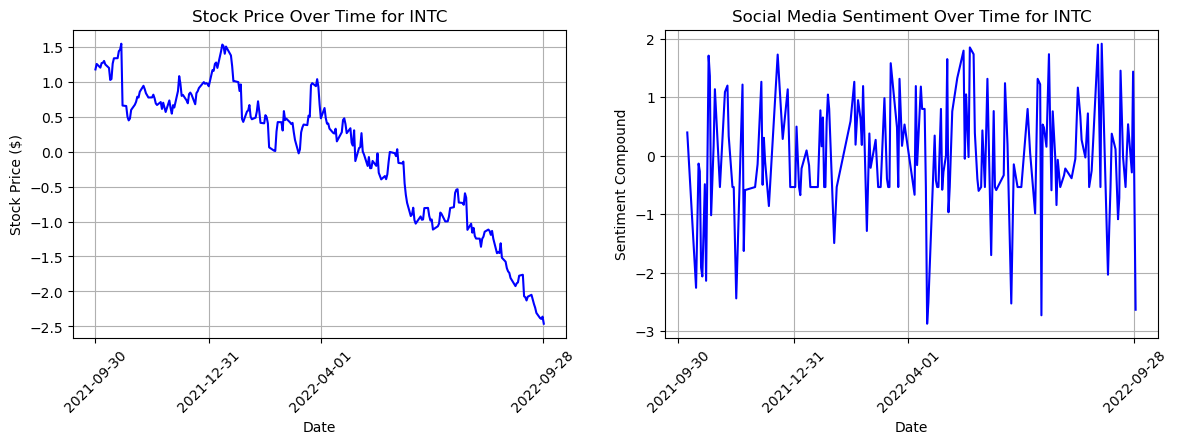

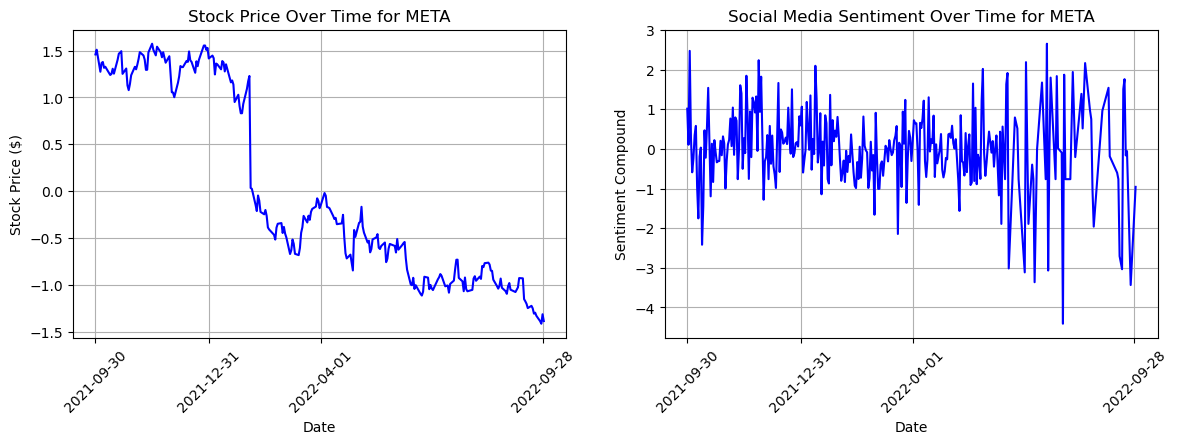

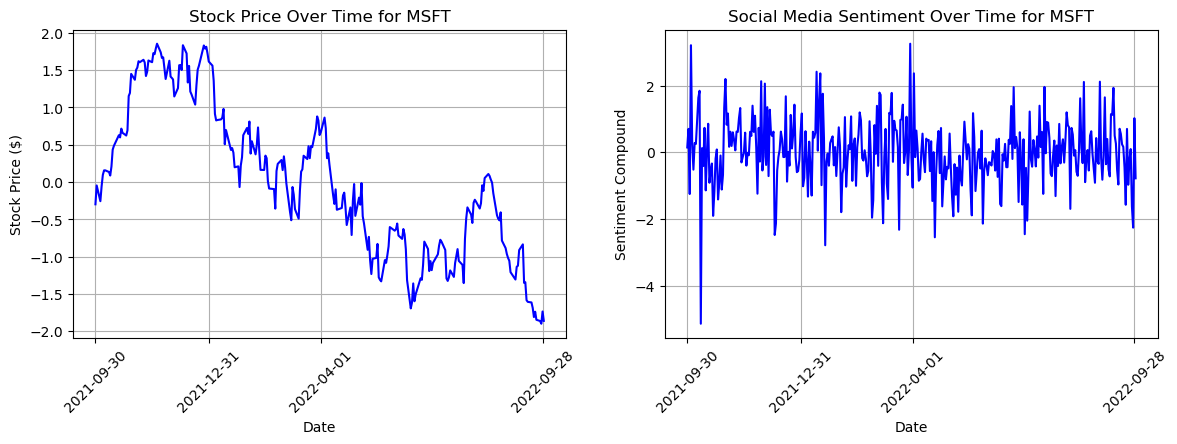

In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    # load finance and sentiment data 
    curr_finance_df = pd.read_csv(f'{stock} Data/{stock}_finance_data.csv')
    curr_sentiment_df = pd.read_csv(f'{stock} Data/{stock}_avg_sentiment_data.csv')
    
    curr_finance_df['Date'] = pd.to_datetime(curr_finance_df['Date'])
    finance_data = curr_finance_df['Close'].values.reshape(-1, 1)

    curr_sentiment_df['Date'] = pd.to_datetime(curr_sentiment_df['Date'])
    sentiment_data = curr_sentiment_df['sentiment_compound'].values.reshape(-1, 1)

    # standardize data
    standard_scaler = StandardScaler()
    finance_standard = standard_scaler.fit_transform(finance_data)
    sentiment_standard = standard_scaler.fit_transform(sentiment_data)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), sharey=False)

    # finance plot (left)
    ax1.plot(curr_finance_df['Date'], finance_standard, linestyle='-', color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"Stock Price Over Time for {stock}")
    xticks = pd.to_datetime(['2021-09-30', '2021-12-31', '2022-04-01', '2022-09-28'])
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
    ax1.grid(True)

    ax2.plot(curr_sentiment_df['Date'], sentiment_standard, linestyle='-', color='blue')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Sentiment Compound")
    ax2.set_title(f"Social Media Sentiment Over Time for {stock}")
    xticks = pd.to_datetime(['2021-09-30', '2021-12-31', '2022-04-01', '2022-09-28'])
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
    ax2.grid(True)


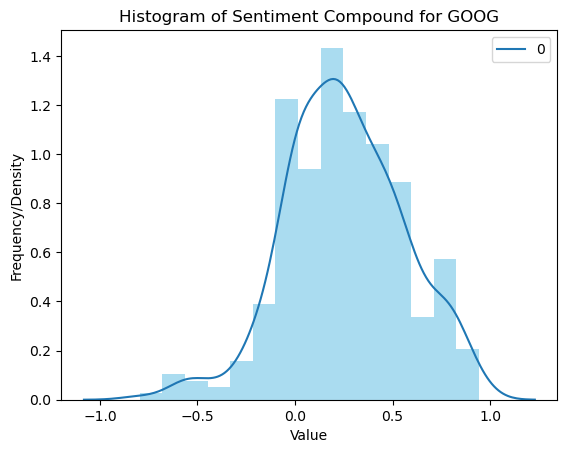

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your dataset
curr_finance_df = pd.read_csv(f'./GOOG Data/GOOG_avg_sentiment_data.csv')
data= curr_finance_df['sentiment_compound'].values.reshape(-1, 1)
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
sns.kdeplot(data, color='red') # Optional: Add Kernel Density Estimate
plt.title('Histogram of Sentiment Compound for GOOG')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()

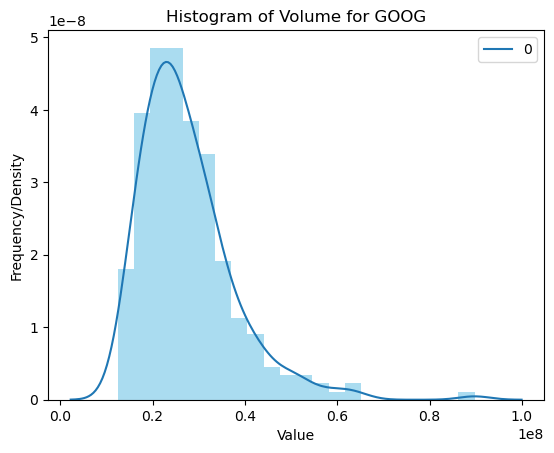

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your dataset
curr_finance_df = pd.read_csv(f'./GOOG Data/GOOG_finance_data.csv')
data= curr_finance_df['Volume'].values.reshape(-1, 1)
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
sns.kdeplot(data, color='red') # Optional: Add Kernel Density Estimate
plt.title('Histogram of Volume for GOOG')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()